<a href="https://colab.research.google.com/github/jasminejj08/Data-Science-Analyses/blob/main/DataScience_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Linear Regression

In [ ]:
#import the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from statsmodels.api import OLS
from sklearn.datasets import load_iris
import os.path
import os
from google.colab import files

In [ ]:
#Save the dataset as a dataframe and give it the name: cars_df
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
cars_df = pd.read_csv(url, delim_whitespace=True, names=["mpg", "cyl", "disp", "hp", "wt",
                                  "acc", "year", "org", "name"], na_values="?")

In [ ]:
#checking that the dataframe look good
cars_df.head()

,mpg,cyl,disp,hp,wt,acc,year,org,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
#Check for NA/NULL values and remove the rows that have NA in any column. Save the result into
#dataframe with the name clean_cars_df
clean_cars_df = cars_df.dropna()

In [ ]:
clean_cars_df.head()

,mpg,cyl,disp,hp,wt,acc,year,org,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


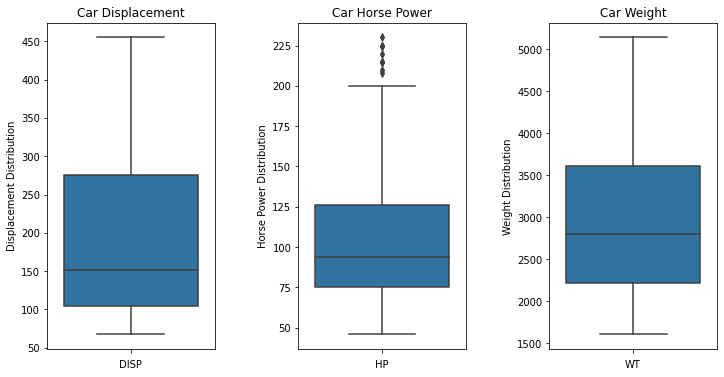

In [ ]:
#Write Python code to display the boxplot for each independent variable used (disp, hp & wt)
#The boxplots should be aligned next to each other and display the graph according to the variable scale.

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

##first boxplot using the disp as the independent variable
##set the axis labels and the titles
sns.boxplot(data=clean_cars_df['disp'], ax=ax[0])
ax[0].set_xlabel('DISP')
ax[0].set_ylabel('Displacement Distribution')
ax[0].set_title('Car Displacement')

##second boxplot with the hp as the independent variable
sns.boxplot(data=clean_cars_df['hp'], ax=ax[1])
ax[1].set_xlabel('HP')
ax[1].set_ylabel('Horse Power Distribution')
ax[1].set_title('Car Horse Power')

##third boxplot with the wt as the independent variable
sns.boxplot(data=clean_cars_df['wt'], ax=ax[2])
ax[2].set_xlabel('WT')
ax[2].set_ylabel('Weight Distribution')
ax[2].set_title('Car Weight')

for subplot in ax:
  subplot.set_xticklabels([])

##adjust the spacing between the graphs and and display them
fig.subplots_adjust(wspace=0.5)
plt.show()


In [ ]:
#Generate different linear regressions:
#Use mpg attribute as the dependent variable

#Multi-linear regression with 3 independent variables (disp, hp & wt)
X = clean_cars_df[['disp', 'hp', 'wt']] #setting the x-variables (independent variables)
y = clean_cars_df['mpg'] #dependent variable

#generating the multi-linear regression
mulregress = linear_model.LinearRegression()
mulregress.fit(X, y)

LinearRegression()

In [ ]:
#multi-linear regression data analysis
print("FOR MULTI-LINEAR REGRESSION")
print("y-intercept: ", mulregress.intercept_)
print("coefficient: ", mulregress.coef_)
print("R2 value: ", mulregress.score(X, y))

FOR MULTI-LINEAR REGRESSION
y-intercept:  44.855935695265046
coefficient:  [-0.00576882 -0.04167414 -0.00535159]
R2 value:  0.7069554693444708


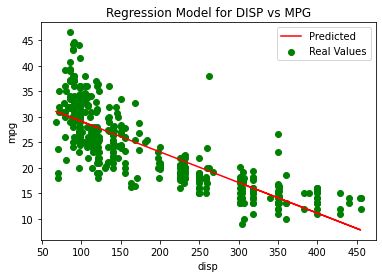

In [ ]:
#Simple linear regression for each variable used (disp, hp & wt) against mpg as the dependent
#variable
#Plot each independent variable against mpg and display the regression line on each graph

#Linear Regression for disp vs mpg
Xd = clean_cars_df[['disp']] #independent variable is disp

dispregress = LinearRegression().fit(Xd, y)
disppredict = dispregress.predict(Xd)

plt.scatter(Xd, y, color='g', label='Real Values')
plt.plot(Xd, disppredict, color='r', label='Predicted')
plt.title("Regression Model for DISP vs MPG")
plt.xlabel("disp")
plt.ylabel("mpg")
plt.legend()
plt.show()

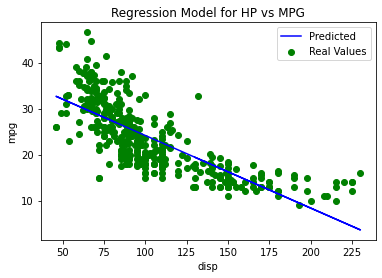

In [ ]:
#Linear Regression for hp
Xh = clean_cars_df[['hp']] #independent variable is hp

hpregress = LinearRegression().fit(Xh, y)
hppredict = hpregress.predict(Xh)

plt.scatter(Xh, y, color='g', label='Real Values')
plt.plot(Xh, hppredict, color='b', label='Predicted')
plt.title("Regression Model for HP vs MPG")
plt.xlabel("disp")
plt.ylabel("mpg")
plt.legend()
plt.show()

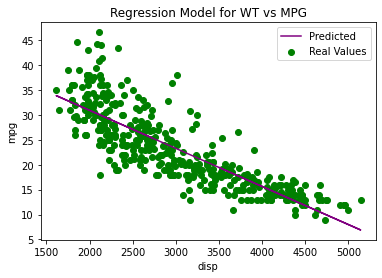

In [ ]:
#Linear Regression for wt
Xw = clean_cars_df[['wt']] #independent variable is disp

wtregress = LinearRegression().fit(Xw, y)
wtpredict = wtregress.predict(Xw)

plt.scatter(Xw, y, color='g', label='Real Values')
plt.plot(Xw, wtpredict, color='purple', label='Predicted')
plt.title("Regression Model for WT vs MPG")
plt.xlabel("disp")
plt.ylabel("mpg")
plt.legend()
plt.show()

In [ ]:
#Explain, briefly, the results of the models: coefficients, intercepts, outliers, R2 for each model generated.
#How significient disp attribute in the multi-linear regression generated?

print("INTERCEPTS are the places/values on the graph where the line crosses the axis. \nFor example, the y-intercept is the place where the regression model touches the y-axis")
print("And at this point, the x-value would be 0. This applies for the x-axis vice-versa.")

print("\nOUTLIERS are data that stray from the rest of the dataset and stick out on the regression model as being the furthest away from the expected linear model.")
print("Outliers can be caused by overlooked factors that could be external or out of control. But they should be looked at because they might provide more")
print("information as to why they exist. Outliers can cause the data to be skewed.")

print("\nCOEFFICIENTS, in this case, represent the slope of the regression model. A negative coefficient")
print("means the a negative regression pointing downwards (negative slope) and vice versa for a positive coefficient.")

print("\nR2, also known as the coefficient of determination, is the variable that measures how good of a fit")
print("the linear regression model is. It is a value that can range from 0 to 1, where the closer it is to 1,")
print("the better the regression model is for the dataset. It can also be negative but that entitles a new")
print("meaning to the regression model. Overall, it determines how much disparity and variance there is")
print("in the dataset and how much of it can be explained by the relationship of the dependent and")
print("independent variables.")

INTERCEPTS are the places/values on the graph where the line crosses the axis. 
For example, the y-intercept is the place where the regression model touches the y-axis
And at this point, the x-value would be 0. This applies for the x-axis vice-versa.

OUTLIERS are data that stray from the rest of the dataset and stick out on the regression model as being the furthest away from the expected linear model.
Outliers can be caused by overlooked factors that could be external or out of control. But they should be looked at because they might provide more
information as to why they exist. Outliers can cause the data to be skewed.

COEFFICIENTS, in this case, represent the slope of the regression model. A negative coefficient
means the a negative regression pointing downwards (negative slope) and vice versa for a positive coefficient.

R2, also known as the coefficient of determination, is the variable that measures how good of a fit
the linear regression model is. It is a value that can range

In [ ]:
#data analysis of disp attribute from disp vs mpg linear regression
print("FOR GRAPH OF: DISP vs MPG")
print("y-intercept: ", dispregress.intercept_)
print("coefficient: ", dispregress.coef_)
print("R2 value: ", dispregress.score(Xd, y))


FOR GRAPH OF: DISP vs MPG
y-intercept:  35.12063593840391
coefficient:  [-0.06005143]
R2 value:  0.6482294003193044


In [ ]:
#data analysis of hp attribute from hp vs mpg linear regression
print("FOR GRAPH OF: HP vs MPG")
print("y-intercept: ", hpregress.intercept_)
print("coefficient: ", hpregress.coef_)
print("R2 value: ", hpregress.score(Xh, y))


FOR GRAPH OF: HP vs MPG
y-intercept:  39.93586102117047
coefficient:  [-0.15784473]
R2 value:  0.6059482578894348


In [ ]:
#data analysis of wt attribute from wt vs mpg linear regression
print("FOR GRAPH OF: WT vs MPG")
print("y-intercept: ", wtregress.intercept_)
print("coefficient: ", wtregress.coef_)
print("R2 value: ", wtregress.score(Xw, y))


FOR GRAPH OF: WT vs MPG
y-intercept:  46.21652454901758
coefficient:  [-0.00764734]
R2 value:  0.6926304331206254


In [ ]:
#looking at the data overall
print("Out of all the regression models, the one with the best fit is the WT vs MPG.")
print("This means that the variance of the independent variable, mpg, can be more well explained")
print("by the wt data than the other columns.")


Out of all the regression models, the one with the best fit is the WT vs MPG.
This means that the variance of the independent variable, mpg, can be more well explained
by the wt data than the other columns.


In [ ]:
#The significance of the disp attribute in the multi-linear regression
print("From the multi-linear regression results before, it can be seen that the disp attribute")
print("decreases at a higher rate as the mpg attribute increases because the coefficient of the")
print("disp attribute is the most strongly negative out of the others. It implies that the")
print("disp attribute decreases by 0.00576882 for ever 1 unit of measurement of mpg.")

From the multi-linear regression results before, it can be seen that the disp attribute
decreases at a higher rate as the mpg attribute increases because the coefficient of the
disp attribute is the most strongly negative out of the others. It implies that the
disp attribute decreases by 0.00576882 for ever 1 unit of measurement of mpg.
